## Build Models

In this notebook, I will read in the preprocessed data and try out a few different models.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import plot_tree
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns

In [2]:
# Import train data
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

# Import test data
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

Start by trying a KNN Regressor.

In [3]:
# Features need to be scaled for the KNN Regressor
scaler = MinMaxScaler()

# Fit and transform the X_train data using the MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
# Apply the scaling to the X_test data
X_test_scaled = scaler.transform(X_test)

# Define function to compute mean absolute error and R-squared score for KNN Regressor
def KNN_score(X_train_scaled, X_test_scaled, y_train, y_test):
    KNN_model = KNeighborsRegressor(n_neighbors = 4)
    KNN_model.fit(X_train_scaled, y_train)
    KNN_predictions = KNN_model.predict(X_test_scaled)
    return (mean_absolute_error(y_test, KNN_predictions), KNN_model.score(X_test, y_test))

# Print mean absolute error
print("KNN Regressor mean absolute error:") 
print(KNN_score(X_train, X_test, y_train, y_test)[0])

# Print R-squared value
print("KNN Regressor R-squared test score:") 
print(KNN_score(X_train, X_test, y_train, y_test)[1])

KNN Regressor mean absolute error:
5.0268692166666655
KNN Regressor R-squared test score:
0.6783426055257837


Now we can try a few decision tree models to see if the performance can be improved.

In [4]:
# Define function to compute mean absolute error and R-squared score for Decision Tree Regressor
def DTR_score(X_train, X_test, y_train, y_test):
    DTR_model = DecisionTreeRegressor(random_state=0)
    DTR_model.fit(X_train, y_train)
    DTR_predictions = DTR_model.predict(X_test)
    return (mean_absolute_error(y_test, DTR_predictions), DTR_model.score(X_test, y_test))

# Print mean absolute error
print("Decision Tree Regressor mean absolute error:") 
print(DTR_score(X_train, X_test, y_train, y_test)[0])

# Print R-squared value
print("Decision Tree Regressor R-squared test score:") 
print(DTR_score(X_train, X_test, y_train, y_test)[1])



Decision Tree Regressor mean absolute error:
4.632126466666665
Decision Tree Regressor R-squared test score:
0.758942878481081


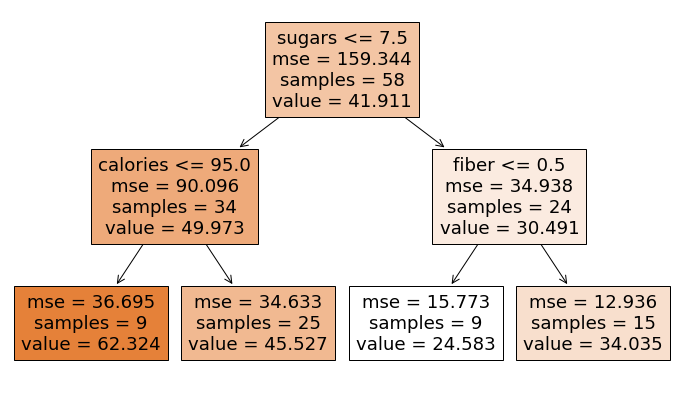

In [5]:
# Visualize a small part of the Decision Tree Regressor
DTR_model_fig = DecisionTreeRegressor(max_depth=2,random_state=0)
DTR_model_fig.fit(X_train, y_train)

cereal_feature_names=('calories','protein','fat','sodium','fiber','sugars','potass','vitamins',
                      'weight','cups', 'mfr A','mfr G','mfr K','mfr N','mfr P','mfr Q','mfr R','cold','hot')

fig = plt.figure(figsize=(12,7))
_ = tree.plot_tree(DTR_model_fig, feature_names=cereal_feature_names,filled=True)

We expect that a Random Forest Regressor can improve on the performance of the Decision Tree Regressor, as it uses an ensemble of decision trees.

In [15]:
# Use GridSearchCV to find best values for n_estimators for Random Forest Regressor
parameter = {
    'n_estimators' : [10, 50, 100, 200],
}

RFR = RandomForestRegressor()
RFR_CV = GridSearchCV(RFR, parameter).fit(X_train, np.ravel(y_train))
RFR_CV.best_params_

{'n_estimators': 200}

In [16]:
# Define function to compute mean absolute error and R-squared score for Random Forest Regressor
def RFR_score(X_train, X_test, y_train, y_test):
    RFR_model = RandomForestRegressor(n_estimators=200)
    RFR_model.fit(X_train, np.ravel(y_train))
    RFR_predictions = RFR_model.predict(X_test)
    return (mean_absolute_error(y_test, RFR_predictions), RFR_model.score(X_test, y_test))

# Print mean absolute error
print("Random Forest Regressor mean absolute error:") 
print(RFR_score(X_train, X_test, y_train, y_test)[0])

# Print R-squared value
print("Random Forest Regressor R-squared test score:") 
print(RFR_score(X_train, X_test, y_train, y_test)[1])


Random Forest Regressor mean absolute error:
3.581621938666663
Random Forest Regressor R-squared test score:
0.8850306837240431


The XGBoost Regressor should provide further improvement.

In [8]:
# Use GridSearchCV to find best values for n_estimators, learning_rate for XGBoost Regressor
parameters = {
    'n_estimators' : [200, 300, 400, 500],
    'learning_rate' : [0.05, 0.075, 0.09, 0.115]
}

XGB = XGBRegressor()
XGB_CV = GridSearchCV(XGB, parameters).fit(X_train, y_train)
XGB_CV.best_params_

{'learning_rate': 0.115, 'n_estimators': 200}

In [9]:
# Define function to compute mean absolute error and R-squared score for XGBoost Regressor
def XGB_score(X_train, X_test, y_train, y_test):
    XGB_model = XGBRegressor(n_estimators=200, learning_rate=0.115)
    XGB_model.fit(X_train, y_train)
    XGB_predictions = XGB_model.predict(X_test)
    return (mean_absolute_error(y_test, XGB_predictions), XGB_model.score(X_test, y_test), XGB_model.feature_importances_)

# Print mean absolute error
print("XGBoost Regressor mean absolute error:") 
print(XGB_score(X_train, X_test, y_train, y_test)[0])

# Print R-squared value
print("XGBoost Regressor R-squared test score:") 
print(XGB_score(X_train, X_test, y_train, y_test)[1])


XGBoost Regressor mean absolute error:
3.123175854500325
XGBoost Regressor R-squared test score:
0.904779484685934


Text(0, 0.5, 'Mean absolute error')

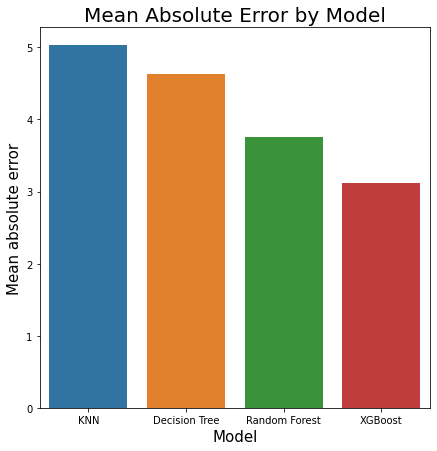

In [17]:
# Plot of mean absolute error values
mae_d = {'model': ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost'], 
         'mae': [KNN_score(X_train, X_test, y_train, y_test)[0], DTR_score(X_train, X_test, y_train, y_test)[0], 
                 RFR_score(X_train, X_test, y_train, y_test)[0], XGB_score(X_train, X_test, y_train, y_test)[0]]}
mae_df = pd.DataFrame(data=mae_d)

plt.figure(figsize=(7,7))
sns.barplot(x=mae_df['model'], y=mae_df['mae'])
plt.title("Mean Absolute Error by Model",fontsize=20)
plt.xlabel("Model",fontsize=15)
plt.ylabel("Mean absolute error",fontsize=15)

We see that the best (lowest) mean absolute error is for the XGBoost Regressor, followed by the Random Forest Regressor, the Decision Tree Regressor, and finally the KNN Regressor.

Text(0, 0.5, 'R-squared value')

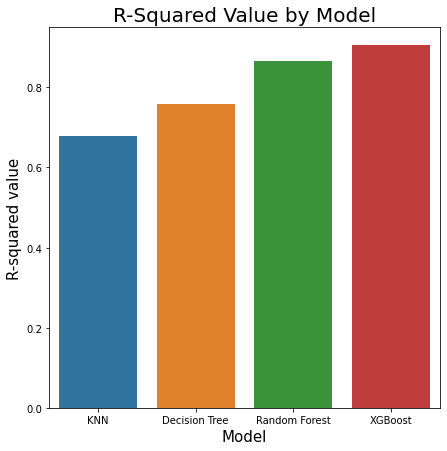

In [18]:
# Plot of R-squared values
r2_d = {'model': ['KNN', 'Decision Tree', 'Random Forest', 'XGBoost'], 
        'r2': [KNN_score(X_train, X_test, y_train, y_test)[1], DTR_score(X_train, X_test, y_train, y_test)[1], 
               RFR_score(X_train, X_test, y_train, y_test)[1], XGB_score(X_train, X_test, y_train, y_test)[1]]}
r2_df = pd.DataFrame(data=r2_d)

plt.figure(figsize=(7,7))
sns.barplot(x=r2_df['model'], y=r2_df['r2'])
plt.title("R-Squared Value by Model",fontsize=20)
plt.xlabel("Model",fontsize=15)
plt.ylabel("R-squared value",fontsize=15)

We see that the best (highest) R-squared value is for the XGBoost Regressor, followed by the Random Forest Regressor, the Decision Tree Regressor, and finally the KNN Regressor.

We can also check how much importance each feature had in the XGBoost model.

<BarContainer object of 19 artists>

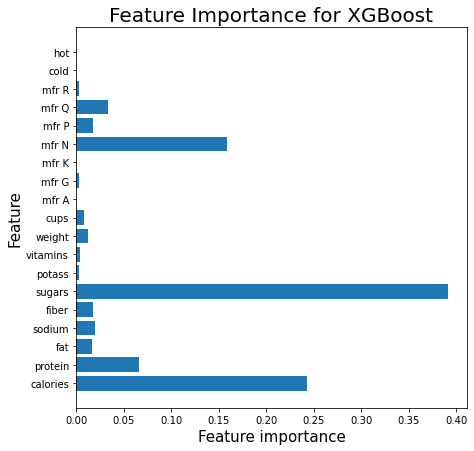

In [12]:
# Plot feature importance for XGBoost Regressor
XGB_score(X_train, X_test, y_train, y_test)[2]
plt.figure(figsize=(7,7))
plt.title("Feature Importance for XGBoost",fontsize=20)
plt.xlabel("Feature importance",fontsize=15)
plt.ylabel("Feature",fontsize=15)
plt.barh(cereal_feature_names, XGB_score(X_train, X_test, y_train, y_test)[2])

Sugars and calories are the most important features in the XGBoost model for the overall nutritional rating, followed, perhaps surprisingly, by mfr N (Nabisco).